In [2]:
# -*- coding:utf-8 -*-
import tushare as ts
import matplotlib.pyplot as plt
#import matplotlib.finance as mpf
import mpl_finance as mpf
import matplotlib.ticker as ticker

import datetime
import numpy as np
import pandas as pd

In [3]:
def candle_stick(stock,start_date, end_date):
    data = ts.get_k_data(stock_selected,start_date,end_date)
    
    if data is not None: #check if data is valid
        data[data['volume']==0]=np.nan
        data=data.dropna()
        data.sort_values(by='date',ascending=True,inplace=True)
        data=data[['date','open','close','high','low','volume']]

        date_tickers=pd.DataFrame({'date':data.date.values})

        #date_tickers.index.values
        final_date_tickers=date_tickers[date_tickers.index.values%10==0]


        #change data to matrix  
        #data_mat=data.as_matrix()  #will be removed
        #data_mat=data.values
        data_mat=np.array(data)
        #data_mat[1:,0]=np.arange(0:len(data_mat[1:,0]))
        data_mat[:,0]=np.arange(0,len(data_mat[:,0]))


        fig,(ax1,ax2)=plt.subplots(2, sharex=True,figsize=(20,10))
        mpf.candlestick_ochl(ax1,data_mat,width=0.5,colordown='#53c156', colorup='#ff1717')


        ax1.grid(True)
        ax1.xaxis_date()

        plt.bar(data_mat[:,0],data_mat[:,5],width=0.5)
        ax2.set_ylabel('Volume')

        #ax2.xaxis.set_major_locator(ticker.MultipleLocator(6))
        #ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
        #plt.xticks(final_date_tickers.index, final_date_tickers['date'], rotation='vertical')

        plt.xticks(final_date_tickers.index, final_date_tickers['date'], rotation=45)
        ax2.grid(True)
        plt.show()
    else:
        print("can't get the data in time!")

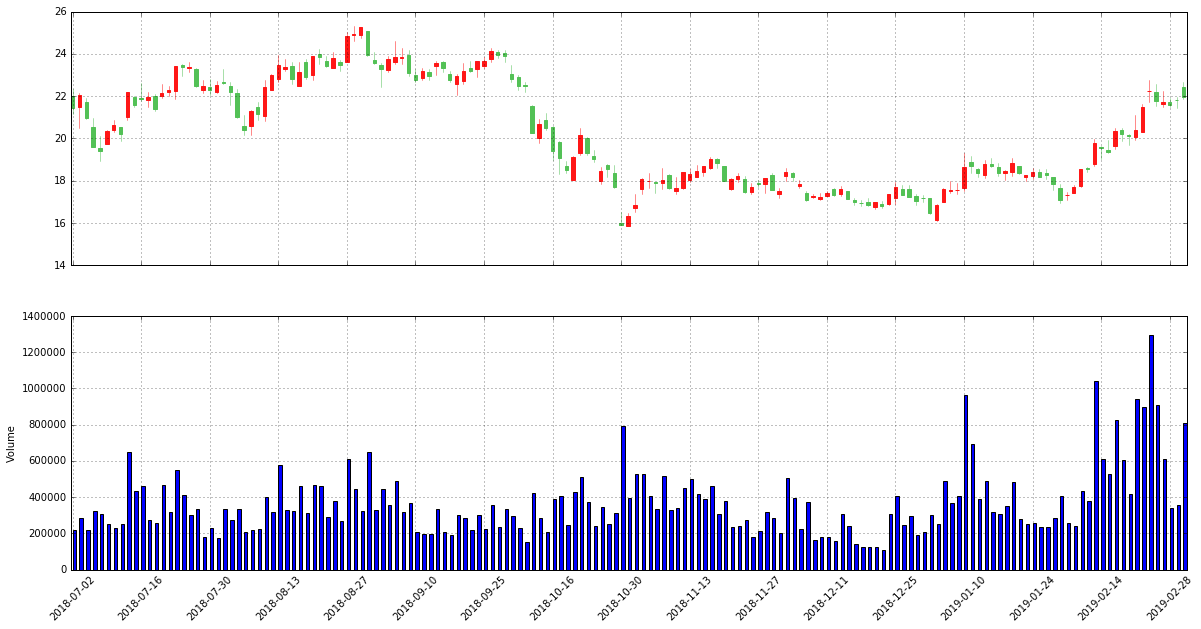

In [4]:
import time
start_date = '2018-07-01'

now = int(time.time())#这是时间戳
#转换为其他日期格式,如:"%Y-%m-%d %H:%M:%S"
timeArray = time.localtime(now)
Time = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
# ================需要修改的参数==============
end_date =  Time #'2017-08-14 15:15:00', 最后生成k线日期
#end_date = '2019-03-01'
stock_selected = '600487'

candle_stick(stock_selected,start_date, end_date)